# Importing libraries

In [1]:
import tensorflow
import cv2,os
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

os.environ['KMP_DUPLICATE_LIB_OK']='True'

ModuleNotFoundError: No module named 'cv2'

# Importing Dataset

In [2]:
data_path='Combined Dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'COVID': 0, 'NORMAL': 1, 'PNEUMONIA': 2}
['COVID', 'NORMAL', 'PNEUMONIA']
[0, 1, 2]


# resizing image

In [3]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

KeyboardInterrupt: 

# Noramlizing image

In [ ]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [ ]:
new_target.shape

In [ ]:
data.shape

In [ ]:
data.shape[1:]

# Appyling CNN

In [ ]:
cnn_model=Sequential()

#First Convolution Layer with 32 filters,2x2 kernel size,
cnn_model.add(Conv2D(32,kernel_size=2,activation='relu',input_shape=(100,100,3)))

#First Max-Pooling Layer
cnn_model.add(MaxPooling2D(pool_size=2))

#Adding Dropout to the layer
cnn_model.add(Dropout(0.2))

#Second Convolution Layer with 16 filters,2x2 kernel size,
cnn_model.add(Conv2D(16,kernel_size=2,activation='relu'))

#First Max-Pooling Layer
cnn_model.add(MaxPooling2D(pool_size=2))

#Adding Dropout to the layer
cnn_model.add(Dropout(0.2))

#Third Convolution Layer with 8 filters,2x2 kernel size,
cnn_model.add(Conv2D(8,kernel_size=2,activation='relu'))

#First Max-Pooling Layer
cnn_model.add(MaxPooling2D(pool_size=2))

#Flattening the layer before entering the dense layers
cnn_model.add(Flatten())

#Fully connected Neural Network
#First Dense layer
cnn_model.add(Dense(units=128,activation='relu'))

#Output layer
cnn_model.add(Dense(units=3,activation='sigmoid'))

cnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
cnn_model.summary()

In [ ]:
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [ ]:
train_data.shape

In [ ]:
train_target.shape

# Training model

In [ ]:
history=cnn_model.fit(train_data,train_target,epochs=10,validation_split=0.2)

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Test')
plt.title("Accuracy")
plt.legend()

plt.figure(figsize=(15,5))
plt.subplot(122)
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.title("Loss")
plt.legend()

In [ ]:
score, acc = cnn_model.evaluate(test_data, test_target,verbose=2, batch_size= 256)
print('Accuracy:', acc)

In [ ]:
from sklearn.metrics import confusion_matrix
y_test_arg=np.argmax(test_target,axis=1)
Y_pred = np.argmax(cnn_model.predict(test_data),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

In [ ]:
cnn_model.save('combined_model.h5')

# Testing 

In [4]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
os.environ['KMP_DUPLICATE_LIB_OK']='True'

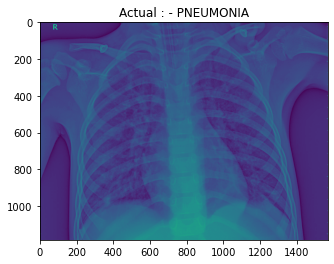

Accuracy: - 0.8713036775588989
Predicted: -  PNEUMONIA


In [5]:
dic = {0:'COVID', 1:'NORMAL', 2:'PNEUMONIA'}
model = load_model('combined_model.h5')

#test_array = ["r'C:\Users\PAKSHAL JAIN\Downloads\ML project\Combined Dataset\PNEUMONIA\person1_bacteria_2.jpeg'","r'C:\Users\PAKSHAL JAIN\Downloads\ML project\Combined Dataset\NORMAL\IM-0001-0001.jpeg'","r'C:\Users\PAKSHAL JAIN\Downloads\ML project\Combined Dataset\COVID\01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg'","r'C:\Users\PAKSHAL JAIN\Downloads\ML project\Combined Dataset\PNEUMONIA\person23_bacteria_101.jpeg'","r'#C:\Users\PAKSHAL JAIN\Downloads\ML project\Combined Dataset\PNEUMONIA\person558_bacteria_2328.jpeg'"]
#print(test_array[0])

model.make_predict_function()

def predict_label(img_path):
    i = image.load_img(img_path, target_size=(100,100))
    i = image.img_to_array(i)/255.0
    i = i.reshape(1, 100,100,3)
    predict_x=model.predict(i)
    classes_x=np.argmax(predict_x,axis=1)
    accuracy=float(np.max(predict_x,axis=1)[0])
    print("Accuracy: -",accuracy)
    return dic[classes_x[0]]



img = mpimg.imread(r'C:\Users\PAKSHAL JAIN\Downloads\ML project\Combined Dataset\PNEUMONIA\person14_virus_44.jpeg')
imgplot = plt.imshow(img)
plt.title("Actual : - PNEUMONIA")
plt.show()
print("Predicted: - ",predict_label(r'C:\Users\PAKSHAL JAIN\Downloads\ML project\Combined Dataset\PNEUMONIA\person14_virus_44.jpeg'))

In [ ]:
#p-C:\Users\PAKSHAL JAIN\Downloads\ML project\Combined Dataset\PNEUMONIA\person1_bacteria_2.jpeg
#n-C:\Users\PAKSHAL JAIN\Downloads\ML project\Combined Dataset\NORMAL\IM-0001-0001.jpeg
#c-C:\Users\PAKSHAL JAIN\Downloads\ML project\Combined Dataset\COVID\01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg
#C:\Users\PAKSHAL JAIN\Downloads\ML project\Combined Dataset\PNEUMONIA\person23_bacteria_101.jpeg
#C:\Users\PAKSHAL JAIN\Downloads\ML project\Combined Dataset\PNEUMONIA\person558_bacteria_2328.jpeg